<h1 style="font-size:40px;"><center>Exercise IV: Classification
    
</center></h1>

For this exercise you are given two classification problems with a fixed training-, validation- and test dataset. A spiral dataset and a japanese vowels dataset.

The **task** is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters. Below the code for training and loading of data, also a very primitive model. However, the model need to be adapted for the two tasks.

# Data
## Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

## Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels].* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

# Code

The following code allows us to edit imported files without restarting the kernel for the notebook

In [1]:
%load_ext autoreload
%autoreload 2

# Hacky solution to access the global utils package
import sys,os
sys.path.append(os.path.dirname(os.path.realpath('..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl

from config import LabConfig
from dataset import MLPData
from DL_labs.utils.model import Model
from DL_labs.utils.progressbar import LitProgressBar
from DL_labs.utils.model import Model
from torch.utils.data import TensorDataset, DataLoader
import torchmetrics
from DL_labs.utils import (
    plot,
    progressbar
) 

/home/stud/f/fremar16/miniconda3/envs/DL-Labs/lib/python3.9/site-packages/pytorch_lightning/metrics/__init__.py:43: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  rank_zero_deprecation(


In [3]:
cfg = LabConfig()

## Task 1
**TODO:** Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.

**Hint 1:** 
Remember to check if input data needs to be normalized. .

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

In [ ]:
# Load dataset - Vowels
from DL_labs.utils.utils import onehot2int
def numpy2Dataloader(x,y, batch_size=25, num_workers=10,**kwargs):
    return DataLoader(
        TensorDataset(
            torch.from_numpy(x).float(), 
            torch.from_numpy(np.argmax(y,axis=1)).long()
        ),
        batch_size=batch_size,
        num_workers=num_workers,
        **kwargs
    )

x_train, y_train, x_val, y_val, x_test, y_test = MLPData.vowels(file_name_train=cfg.ae_train, file_name_test=cfg.ae_test)

train_loader = numpy2Dataloader(x_train,y_train)
val_loader =  numpy2Dataloader(x_val,y_val)
test_loader =  numpy2Dataloader(x_test,y_test)

num_classes = 9
print(f'|{"Type":10} | {"Input size":10} | {"Target size":10}|')
print(f'|{"-"*11}|{"-"*12}|{"-"*12}|')
print(f'|{"train":10} | {str(x_train.shape):10} | {str(y_train.shape):10} |')
print(f'|{"val":8}   | {str(x_val.shape):10} | {str(y_val.shape):10} |')
print(f'|{"test":9}  | {str(x_test.shape):10} | {str(y_test.shape):10} |')

In [ ]:
# TODO - Create model 

# TODO - Setup configurations

# TODO - Run model

# TODO - Validate performance

## Task 2
For this last exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test data) with as small as possible model, in terms of the number of trainable weights. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try!

**TODO:** Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model.

In [18]:
# Load dataset
def numpy2Dataloader(x,y, batch_size=25, num_workers=10,**kwargs):
    return DataLoader(
        TensorDataset(
            torch.from_numpy(x).float(), 
            torch.from_numpy(y).long()
        ),
        batch_size=batch_size,
        num_workers=num_workers,
        **kwargs
    )
x_train, y_train = MLPData.spiral(cfg.spiral_path)
train_loader = numpy2Dataloader(x_train,y_train)

In [13]:
# TODO - Create model 

# TODO - Setup configurations

# TODO - Run model

# TODO - Validate performance

# Defining model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: **Note:** They can all be specified when you call
this function in later cells. The ones specified in this cell are the default values.


In [4]:
class MLP(torch.nn.Module):
    def __init__(self, 
                inp_dim=None,         
                hidden_nodes=1,                      # number of nodes in hidden layer
                num_out=None,
                **kwargs
            ):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(inp_dim, hidden_nodes)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_nodes, num_out)


    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        return torch.sigmoid(output)

## Define a function that allow us to convert numpy to pytorch DataLoader

In [5]:
from DL_labs.utils.utils import onehot2int
def numpy2Dataloader(x,y, batch_size=25, num_workers=10,**kwargs):
    return DataLoader(
        TensorDataset(
            torch.from_numpy(x).float(), 
            torch.from_numpy(np.argmax(y,axis=1)).long()
        ),
        batch_size=batch_size,
        num_workers=num_workers,
        **kwargs
    )

## Load dataset - Vowels

In [6]:
x_train, y_train, x_val, y_val, x_test, y_test = MLPData.vowels(file_name_train=cfg.ae_train, file_name_test=cfg.ae_test)

train_loader = numpy2Dataloader(x_train,y_train)
val_loader =  numpy2Dataloader(x_val,y_val)
test_loader =  numpy2Dataloader(x_test,y_test)

num_classes = 9
print(f'|{"Type":10} | {"Input size":10} | {"Target size":10}|')
print(f'|{"-"*11}|{"-"*12}|{"-"*12}|')
print(f'|{"train":10} | {str(x_train.shape):10} | {str(y_train.shape):10} |')
print(f'|{"val":8}   | {str(x_val.shape):10} | {str(y_val.shape):10} |')
print(f'|{"test":9}  | {str(x_test.shape):10} | {str(y_test.shape):10} |')

|Type       | Input size | Target size|
|-----------|------------|------------|
|train      | (4274, 12) | (4274, 9)  |
|val        | (2275, 12) | (2275, 9)  |
|test       | (3412, 12) | (3412, 9)  |


## Configuration
Setup our local config that should be used for the trainer.

*train_metrics*, *validation_metrics* and *test_metrics* define metrics from torchmetrics to use during training.

In [7]:
# TODO
config = {
    'max_epochs':20,
    'model_params':{
        'inp_dim':x_train.shape[1],         
        'hidden_nodes':1,   # activation functions for the hidden layer
        'num_out':y_train.shape[1] # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes
    },
    'criterion':torch.nn.CrossEntropyLoss(), # error function
    'optimizer':{
        "type":torch.optim.Adam,
        "args":{
            "lr":0.005,
        }
    },
    "train_metrics":torchmetrics.MetricCollection([
        torchmetrics.Accuracy(num_classes=y_train.shape[1],compute_on_step=False),
    ],postfix="_Train"),
    "validation_metrics":torchmetrics.MetricCollection([
        torchmetrics.Accuracy(num_classes=y_train.shape[1],compute_on_step=False),
    ],postfix="_Validation"),
    "test_metrics":torchmetrics.MetricCollection([
        torchmetrics.Accuracy(num_classes=y_train.shape[1],compute_on_step=False),
    ],postfix="_Test")
}

## Training

Lastly, put everything together and call on the trainers fit method. 

In [8]:
model = Model(MLP(**config["model_params"]),**config)

trainer = pl.Trainer(
            max_epochs=config['max_epochs'], 
            gpus=cfg.GPU,
            logger=pl.loggers.TensorBoardLogger(save_dir=cfg.TENSORBORD_DIR),
            callbacks=[LitProgressBar()],
            progress_bar_refresh_rate=1,
            weights_summary=None, # Can be None, top or full
            num_sanity_val_steps=10,   
        )
trainer.fit(
    model, 
    train_dataloader=train_loader,
    val_dataloaders=val_loader
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


## Evaluation
Run the testset and evaluate the performance of the model.

In [9]:
# Move to correct device!
trainer.test(model, test_dataloaders=test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'loss_Test': 1.9360814094543457}
--------------------------------------------------------------------------------


[{'loss_Test': 1.9360814094543457}]

In [10]:
trainer.logged_metrics

{'loss_Validation': tensor(1.9341, device='cuda:0'),
 'epoch': tensor(19.),
 'Accuracy_Validation': tensor(0.2211, device='cuda:0'),
 'Loss_Train': tensor(2.0471, device='cuda:0'),
 'Accuracy_Train': tensor(0.1235, device='cuda:0'),
 'loss_Test': tensor(1.9361)}

### Confusion matrix 

<ipython-input-11-210b4c77e092>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predictions = torch.argmax(torch.nn.functional.softmax(model(torch.from_numpy(x_train).float())),dim=1)


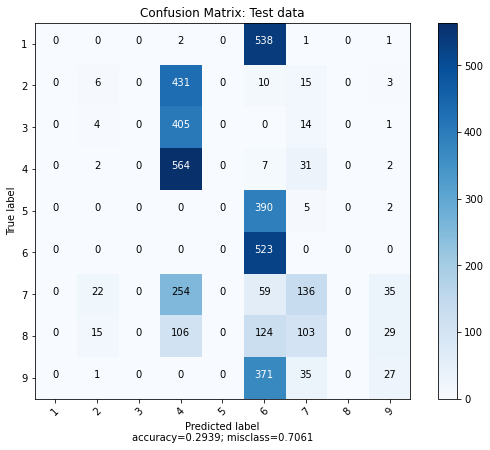

In [11]:
predictions = torch.argmax(torch.nn.functional.softmax(model(torch.from_numpy(x_train).float())),dim=1)
target = torch.argmax(torch.from_numpy(y_train), axis=1)

confuTst = torchmetrics.functional.confusion_matrix(predictions.detach().cpu(),target.int().detach().cpu(), cfg.AE_NUM_CLASSES)

plot.confusion_matrix(cm = confuTst.numpy(), 
                      normalize = False,
                      target_names = cfg.AE_CLASSES,
                      title = "Confusion Matrix: Test data")